In [301]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

Function for adding salt and pepper noise in the original image

In [302]:
def add_noise(image, percent):
    noisy_image = image.copy()
    height, width = image.shape

    noise_amount = int(height * width * (percent / 100))

    # add salt noise
    for i in range(noise_amount):
        xcoord = random.randint(0, width - 1)
        ycoord = random.randint(0, height - 1)
        noisy_image[ycoord][xcoord] = 255

    # add pepper noise
    for i in range(noise_amount):
        xcoord = random.randint(0, width - 1)
        ycoord = random.randint(0, height - 1)
        noisy_image[ycoord][xcoord] = 0

    return noisy_image

Function for Average Filter

In [303]:
def avg_filter(image, kernel):
    filtered_image = np.zeros_like(image)
    height, width = image.shape

    padding = kernel // 2
    mask = np.ones((kernel, kernel)) / (kernel ** 2)

    starting_row = 0 + padding
    starting_col = 0 + padding
    ending_row = height - padding
    ending_col = width - padding

    for row in range(starting_row, ending_row):
        for col in range(starting_col, ending_col):
            neighborhood = image[row - padding : row + padding + 1, col - padding : col + padding + 1]
            average_value = np.sum(neighborhood * mask)
            filtered_image[row][col] = average_value

    return filtered_image

Calculate the PSNR value of noisy and filtered image

In [304]:
def cal_PSNR(original_image, noisy_image):
    original_image, noisy_image = np.float64(original_image), np.float64(noisy_image)

    Imax = 255.0
    mse = np.mean((original_image - noisy_image) ** 2)
    PSNR_val = 20 * np.log10(Imax / np.sqrt(mse))

    return round(PSNR_val, 2)

Load the original image

In [305]:
original_image = cv2.imread('./images/pcb.png', 0)
gray_image = cv2.resize(original_image, (512, 512))
print(gray_image.shape)

(512, 512)


Adding noise to the original image

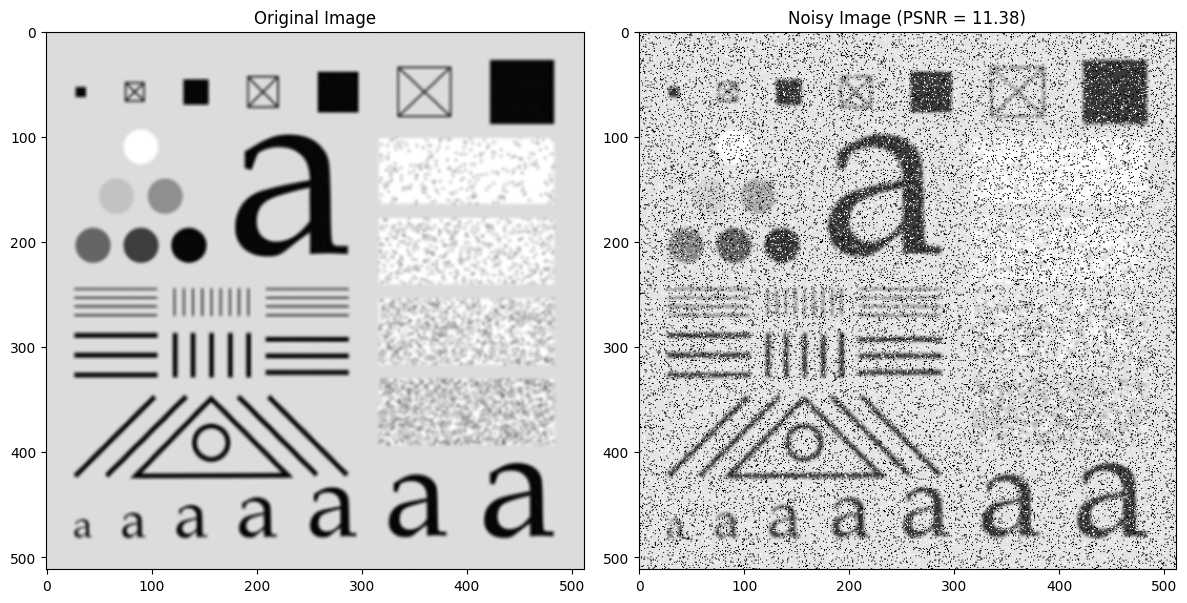

In [306]:
percent = 10
noisy_image = add_noise(gray_image, percent)
noisy_PSNR = cal_PSNR(gray_image, noisy_image)

plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title(f"Original Image")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title(f"Noisy Image (PSNR = {noisy_PSNR})")

plt.tight_layout()
plt.show()

Calculating the value of PSNR of agerage filtered image

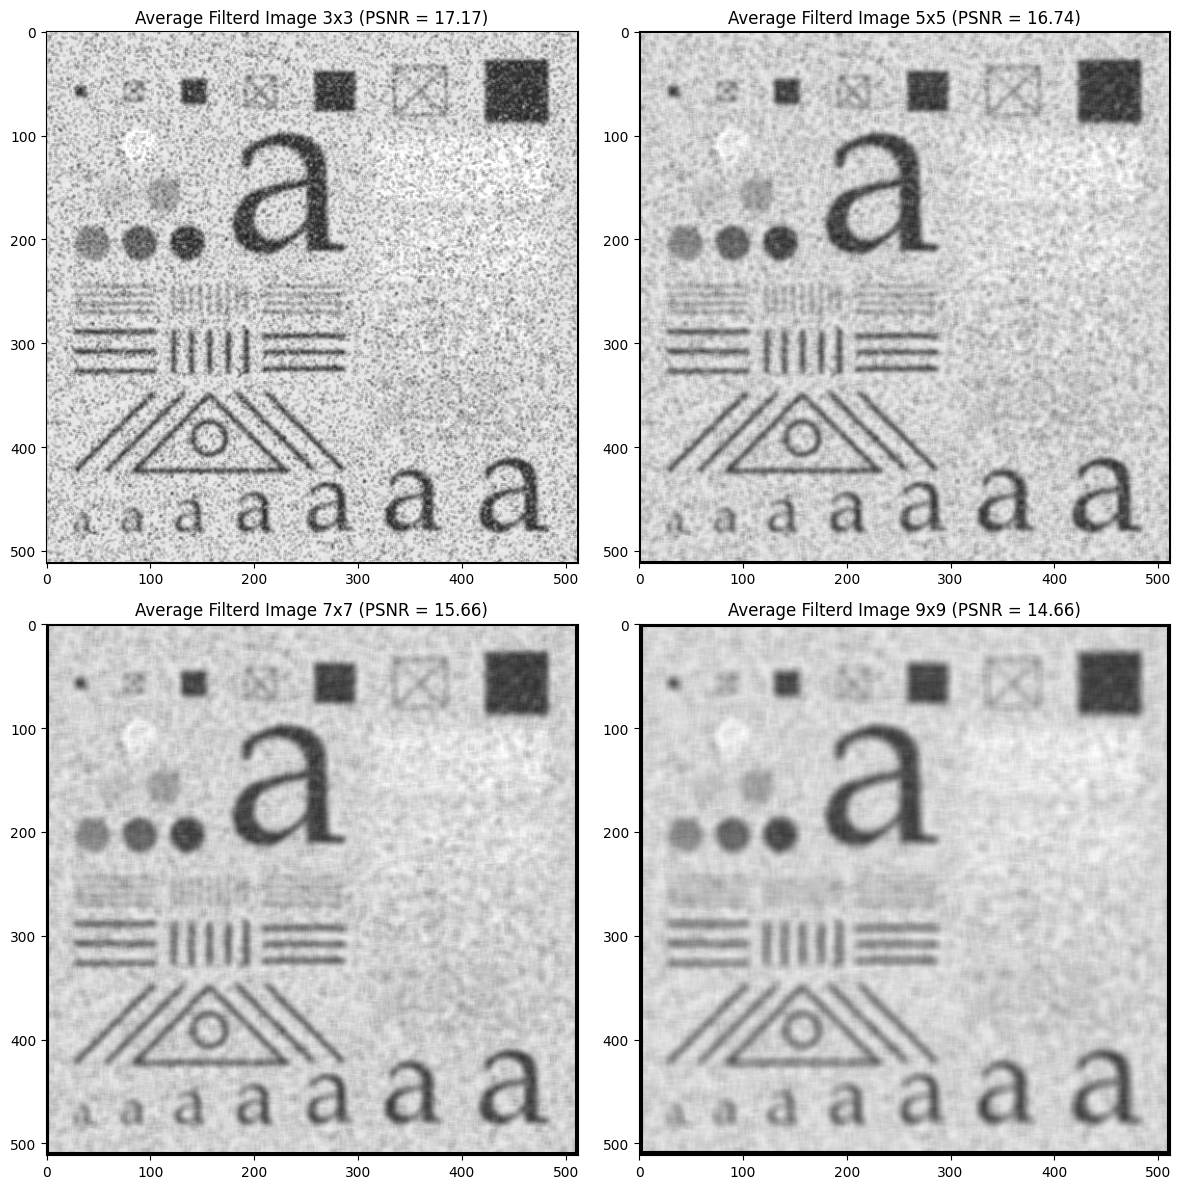

In [307]:
kernel = [3, 5, 7, 9]

plt.figure(figsize=(12, 12))
for i in range(len(kernel)):
    avg_filtered_img = avg_filter(noisy_image, kernel[i])
    avg_PSNR = cal_PSNR(gray_image, avg_filtered_img)

    plt.subplot(2, 2, i+1)
    plt.imshow(avg_filtered_img, cmap='gray')
    plt.title(f"Average Filterd Image {kernel[i]}x{kernel[i]} (PSNR = {avg_PSNR})")

plt.tight_layout()
plt.show()

Displaying the filtered image